In [1]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Report mismatch ratio

In [3]:
dat = pd.read_csv("reports/NASCseq_Summary.tsv", sep="\t")
dat.index = dat["Cell"]
dat = dat[dat["Uniq.Reads"] >= 700000]

data = dict()
data["NASC-seq"] = dat[["2022" in run for run in dat["Run"]]]
data["GSE128273"] = dat[dat["Run"] == "GSE128273_NASCseq_K562"]
data["GSE128273_SE"] = dat[dat["Run"] == "GSE128273_NASCseq_K562_SE"]

Name: NASC-seq, s4U: 0, Time: 3, Cells: 35


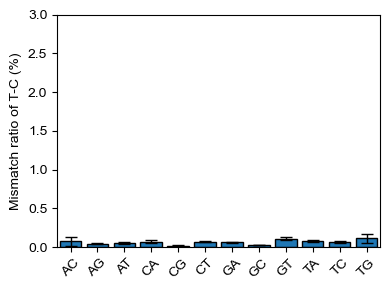

Name: NASC-seq, s4U: 50, Time: 2, Cells: 9


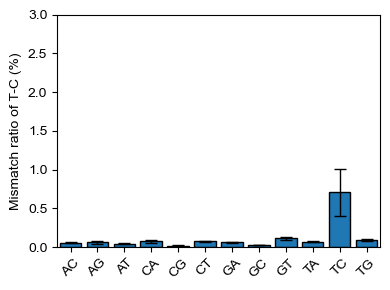

Name: NASC-seq, s4U: 50, Time: 3, Cells: 28


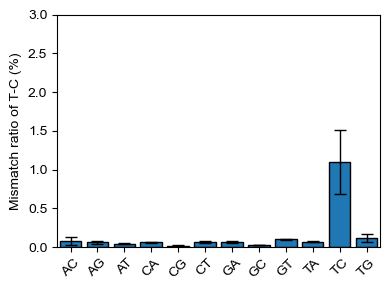

Name: NASC-seq, s4U: 100, Time: 2, Cells: 9


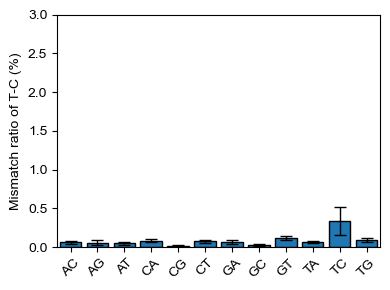

Name: NASC-seq, s4U: 100, Time: 3, Cells: 11


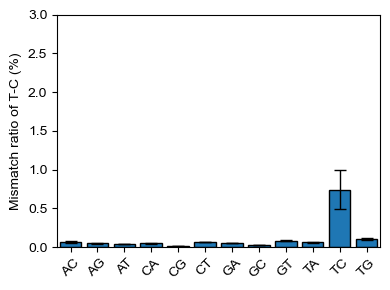

Name: NASC-seq, s4U: 200, Time: 2, Cells: 10


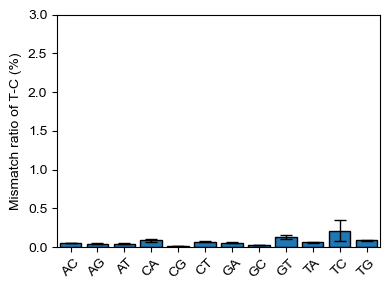

Name: NASC-seq, s4U: 200, Time: 3, Cells: 9


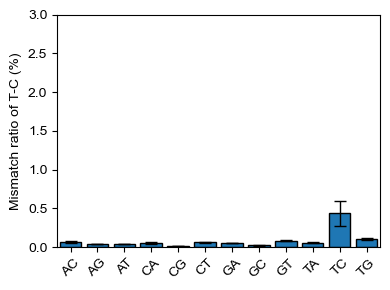

Name: NASC-seq, s4U: 500, Time: 2, Cells: 11


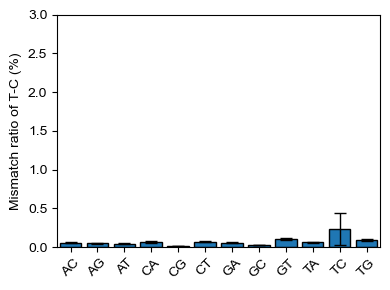

Name: GSE128273, s4U: 50, Time: 0, Cells: 41


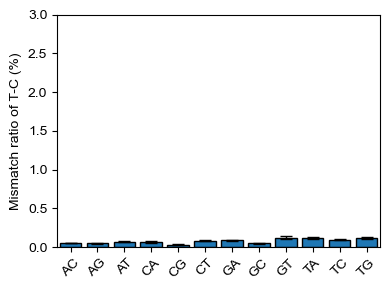

Name: GSE128273, s4U: 50, Time: 1, Cells: 101


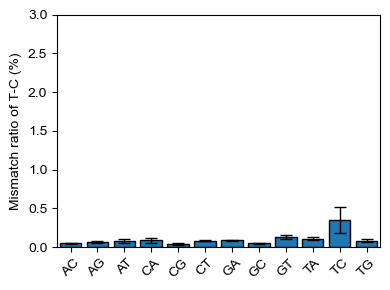

Name: GSE128273_SE, s4U: 0, Time: 3, Cells: 13


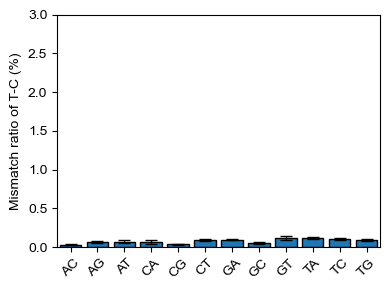

Name: GSE128273_SE, s4U: 50, Time: 3, Cells: 67


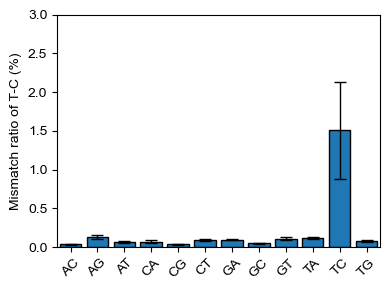

In [4]:
mtypes = []
for b1 in "ACGT":
    for b2 in "ACGT":
        if b1 != b2:
            mtypes.append(b1 + b2)

for name, d in data.items():
    for s4u, d1 in d.groupby(by="s4U"):
        for time, d2 in d1.groupby(by="Time"):
            print("Name: %s, s4U: %d, Time: %d, Cells: %d" % (name, s4u, time, len(d2)))
            m = d2[["%s.Ratio" % mt for mt in mtypes]] * 100
            xs = np.arange(len(mtypes))
            plt.figure(figsize=(4, 3))
            plt.bar(xs, m.mean(), yerr=m.std(), edgecolor="black", error_kw=dict(capsize=4, lw=1))
            plt.xticks(xs, mtypes, rotation=45)
            plt.xlim(-0.5, xs[-1] + 0.5)
            plt.ylim(0, 3)
            plt.ylabel("Mismatch ratio of T-C (%)")
            plt.tight_layout()
            plt.show()
            plt.close()

# Comparison of mismatch ratio

In [19]:
dat = pd.read_csv("reports/NASCseq_Summary.tsv", sep="\t")
dat.index = dat["Cell"]
dat = dat[dat["Uniq.Reads"] >= 700000]

In [38]:
array = []
d = dat[(dat["Run"] == "GSE128273_NASCseq_K562") & (dat["s4U"] == 50) & (dat["Time"] == 0.25)]
array.append(["GSE128273_50uM_15min", d])
d = dat[(dat["Run"] == "GSE128273_NASCseq_K562") & (dat["s4U"] == 50) & (dat["Time"] == 1)]
array.append(["GSE128273_50uM_1h", d])
d = dat[(dat["Run"] == "GSE128273_NASCseq_K562_SE") & (dat["s4U"] == 0) & (dat["Time"] == 3)]
array.append(["GSE128273_0uM_3h", d])
d = dat[(dat["Run"] == "GSE128273_NASCseq_K562_SE") & (dat["s4U"] == 50) & (dat["Time"] == 3)]
array.append(["GSE128273_50uM_3h", d])

In [39]:
tmp = dat[dat["Run"].isin(['20220113_NASCseq_K562', '20220321_NASCseq_K562', '20220418_NASCseq_K562'])]
for s4u, d1 in sorted(tmp.groupby(by="s4U")):
    for time, d2 in sorted(d1.groupby(by="Time")):
        array.append(["NASCseq_%duM_%dh" % (s4u, time), d2])

In [40]:
for name, d in array:
    print(len(d), name, sep="\t")

41	GSE128273_50uM_15min
101	GSE128273_50uM_1h
13	GSE128273_0uM_3h
67	GSE128273_50uM_3h
35	NASCseq_0uM_3h
9	NASCseq_50uM_2h
28	NASCseq_50uM_3h
9	NASCseq_100uM_2h
11	NASCseq_100uM_3h
10	NASCseq_200uM_2h
9	NASCseq_200uM_3h
11	NASCseq_500uM_2h


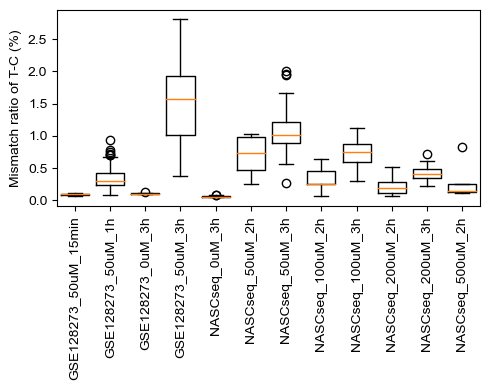

In [42]:
plt.figure(figsize=(5, 4))
for i, (name, d) in enumerate(array):
    plt.boxplot([d["TC.Ratio"] * 100], positions=[i], widths=0.8)
plt.xticks(np.arange(len(array)), [item[0] for item in array], rotation=90)
plt.ylabel("Mismatch ratio of T-C (%)")
plt.tight_layout()
plt.show()